# Real World Banchmark
We show the results of the py-edd-ytracker that works on gridded sea surface height and velcities to detect eddies.
Also we incorporate the data basis which is input to our algortihm to intuitively see which eddies are possible for our algortihm to detect.

In [1]:
# IMPORT
%run ../scripts/experiment_utils.py

from cartopy import crs as ccrs
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from py_eddy_tracker.dataset.grid import UnRegularGridDataset
from VoCC import VortexCorrelationClustering

In [2]:
# Load the sea surface height data if the relevant day from the ocean simulation output and use py-eddy-tracker to identify eddies with expert tuned parameters.
g = UnRegularGridDataset('../data/ssh_u_v_1d_20111029.nc',
                      'nav_lon', 'nav_lat', centered=True)
g.high_filter('ssh',w_cut=700,factor=8.0)
date = datetime(2011,10,29)
a,c = g.eddy_identification('ssh', 'u', 'v', date = date, step=0.004, shape_error=70)

coordinates = np.load('../data/particles_29102011.npy')
X,Y,U,V = coordinates[::3].T

# The magnitude of the movement are two days we normalize them to one.
U /= 2
V /= 2
# Set outliers to zero
U[U > 1] = 0
V[V > .5] = 0

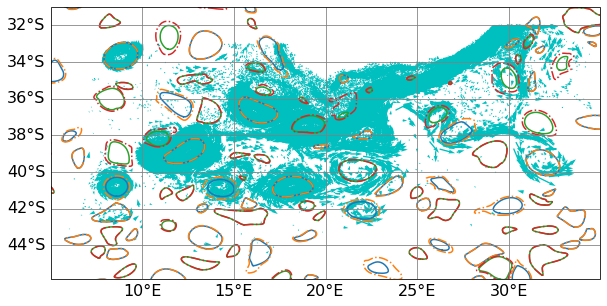

In [3]:
# We plot the py-eddy-tracker eddies on to of a quiver plot with the available particles to show what would be possible to detect with the available data.
lat_min = -45
lat_max = -31
lon_min = 5
lon_max = 35
extent = [lon_min, lon_max, lat_min, lat_max]
projection = ccrs.PlateCarree()
fig , ax = plt.subplots(1,1,figsize=(10,5),subplot_kw=dict(projection=projection))

ax.quiver(X,Y,U,V,scale=20,color='c',transform=ccrs.PlateCarree())
a.display(ax, transform = ccrs.PlateCarree())
c.display(ax,transform=ccrs.PlateCarree())

ax.set_extent(extent)
gl = ax.gridlines(draw_labels=True,color='grey')
gl.top_labels = False
gl.right_labels = False
gl.xlabel_style, gl.ylabel_style = {'fontsize': 16}, {'fontsize': 16}

plt.savefig('../fig/eddy_tracking_detection_ssh_vel.png',dpi=300)